Name : Maroua Boumchich

## Part 1

In [ ]:
import pandas as pd
#Loading the dataset
ds = pd.read_csv('Final_Exam_Dataset_25.csv',delimiter=';')

In [ ]:
#Displaying the first 5 rows
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,Male,19.0,15.0,39,Fez
1,2,Male,21.0,15.0,81,Fez
2,3,Female,20.0,16.0,6,Casablanca
3,4,Female,23.0,16.0,77,Nador
4,5,Female,31.0,17.0,40,Meknas


In [ ]:
#Checking if any missing values exist
ds.isnull().sum()

CustomerID                 0
Gender                     3
Age                        1
Annual Income (k$)         2
Spending Score (1-100)     0
City                      15
dtype: int64

In [ ]:
#droping the rows with missing values in city and gender
ds = ds.dropna(subset=['City','Gender'])

In [ ]:
#Replace the null values in Annual Income with the median
ds['Annual Income (k$)'] = ds['Annual Income (k$)'].fillna(ds['Annual Income (k$)'].median())
#Replace the null values in Age with the median
ds['Age'] = ds['Age'].fillna(ds['Age'].median())

In [ ]:
#Convert the Gender values into numerical values
ds['Gender'] = ds['Gender'].map({'Male':0,'Female':1})

In [ ]:
#Convert the City values into numerical values
ds['City'] = ds['City'].map({'Tangier': 1,'Tetwan':2,'Alhoceima': 3,'Rabat':4, 'Casablanca':5,'Nador':6 ,'Fez':7,'Meknas':8,'Oujda':9,'Settat':10,'Marrakesh':11})

In [ ]:
#show the changes done
ds

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,0,19.0,15.0,39,7
1,2,0,21.0,15.0,81,7
2,3,1,20.0,16.0,6,5
3,4,1,23.0,16.0,77,6
4,5,1,31.0,17.0,40,8
...,...,...,...,...,...,...
2520,2521,0,23.0,89.0,70,5
2521,2522,0,18.0,96.0,1,6
2522,2523,1,25.0,79.0,79,3
2523,2524,0,56.0,18.0,97,6


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#I chose to drop this column because i don't find it relevant or interisting to study
ds = ds.drop(columns = ['CustomerID'])

In [ ]:
#Assign the dataset to X
X = ds
#Initialize the scaler
s = StandardScaler()
#Calculate (fit) and apply (transform) on the X
X_S = s.fit_transform(X)

In [ ]:
#Display the scaled X
X_S

array([[-1.00760772, -1.59044103, -1.69556166, -0.41926679,  0.31132191],
       [-1.00760772, -1.45913727, -1.69556166,  1.0504142 ,  0.31132191],
       [ 0.99244972, -1.52478915, -1.66764141, -1.57401614, -0.32973274],
       ...,
       [ 0.99244972, -1.19652975,  0.09133383,  0.98042939, -0.97078739],
       [-1.00760772,  0.83867855, -1.61180093,  1.61029267, -0.00920541],
       [-1.00760772, -0.3430553 ,  0.56597794, -0.76919084,  0.63184924]],
      shape=(2507, 5))

## Part 2

<Axes: xlabel='Age', ylabel='Count'>

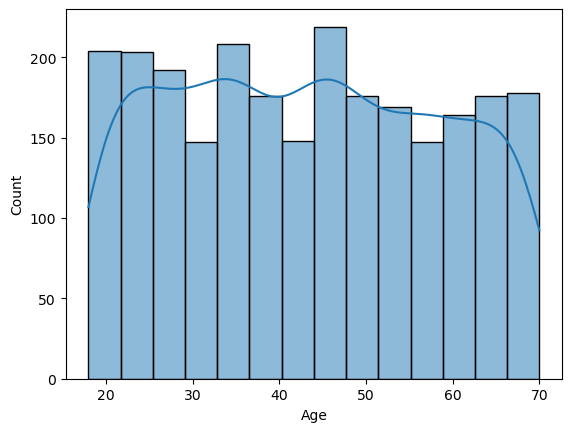

In [ ]:
import seaborn as sns
#the distribution of age
sns.histplot(data=ds, x="Age", kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

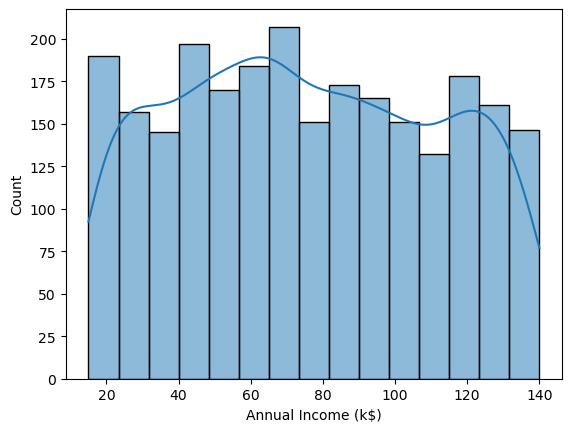

In [ ]:
#the distribution of Annual Income
sns.histplot(data=ds, x="Annual Income (k$)", kde=True)

<Axes: xlabel='City', ylabel='Count'>

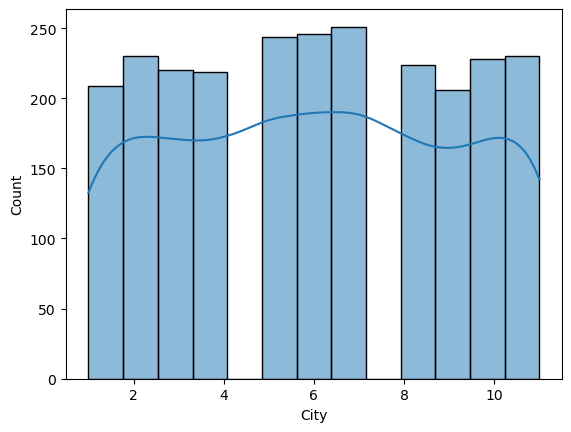

In [ ]:
#the distribution of City
sns.histplot(data=ds, x="City", kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

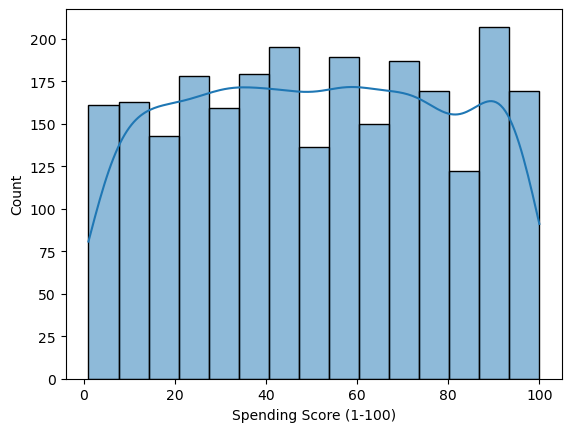

In [ ]:
#the distribution of Spending Score
sns.histplot(data=ds, x="Spending Score (1-100)", kde=True)

Text(0, 0.5, 'Spending Score')

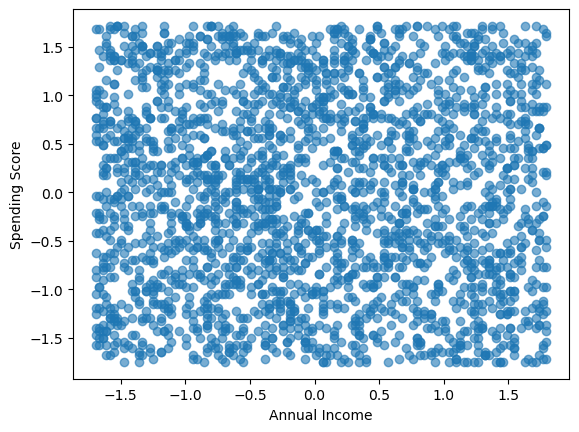

In [ ]:
#Now we'll see potential customer groupings i will start with the most obvious one
#Annual Income and Spending Score
import matplotlib.pyplot as plt
plt.scatter(X_S[:, 2], X_S[:, 3], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Age')

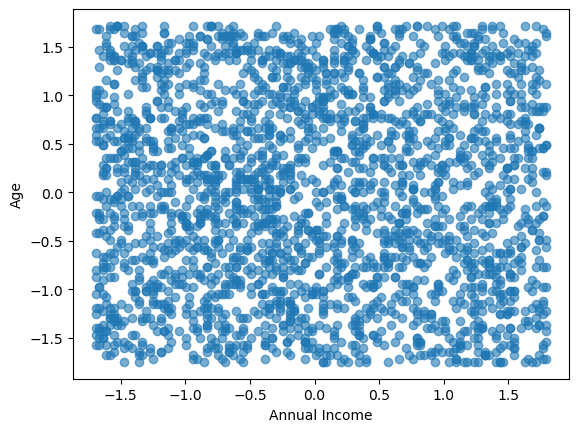

In [ ]:
#Annual Income and Age
plt.scatter(X_S[:, 2], X_S[:, 3], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Age")

Text(0, 0.5, 'City')

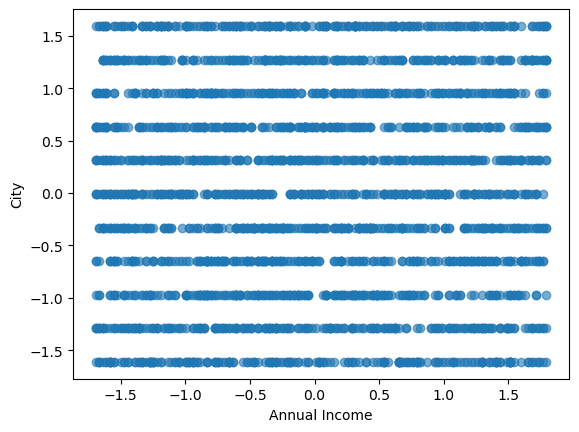

In [ ]:
#Annual Income and City
plt.scatter(X_S[:, 2], X_S[:, 4], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("City")

Text(0, 0.5, 'Gender')

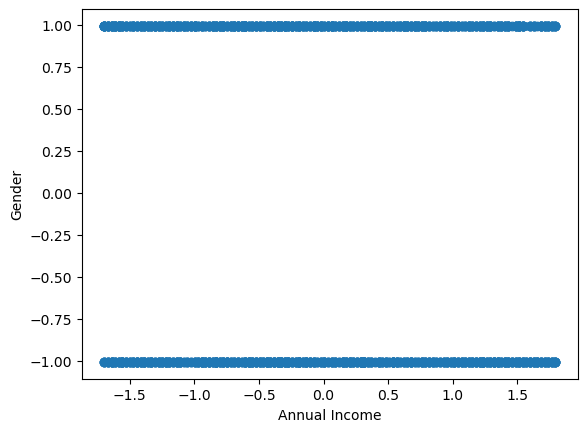

In [ ]:
#Annual Income and gender
plt.scatter(X_S[:, 2], X_S[:, 0], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Gender")

In [ ]:
#Apply the PCA to reduce to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_P = pca.fit_transform(X_S)

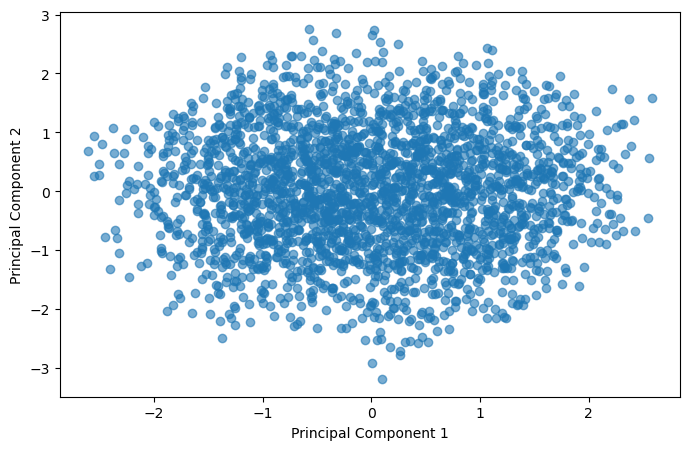

In [ ]:
#ploting the result after appling PCA 
plt.figure(figsize=(8, 5))
plt.scatter(X_P[:, 0], X_P[:, 1], alpha=0.6)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

## Part 3

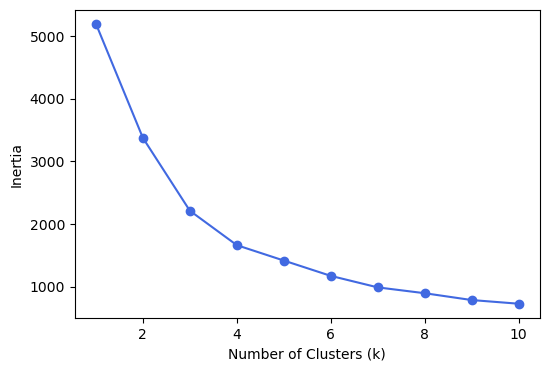

In [ ]:
#we use the elbow method to choose the best number of clusters K
from sklearn.cluster import KMeans
inertia = []
clusters_number = range(1, 11)

for k in clusters_number:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_P)
    inertia.append(model.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(clusters_number, inertia, marker='o', color='royalblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [ ]:
#Apply K-Means
#the best k is 3 because the the decrease of inertia isn't very big
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3, random_state=42)
model1.fit(X_P)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = model1.fit_predict(X_P)

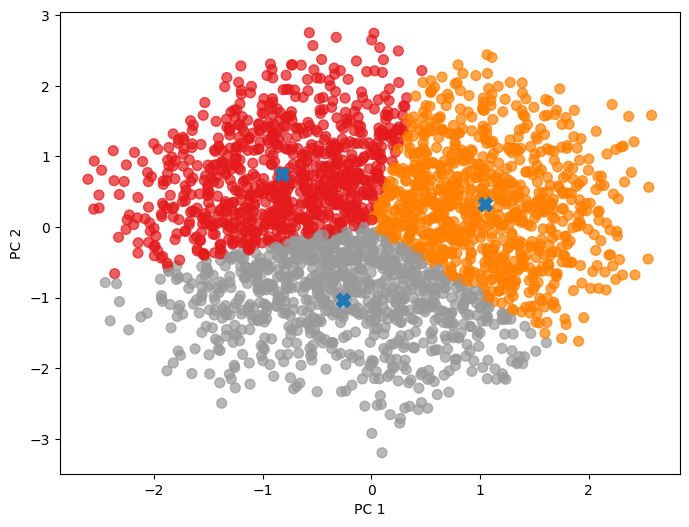

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_P[:, 0], X_P[:, 1], c=labels, cmap='Set1', s=50, alpha=0.7)
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=100,marker='X')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [ ]:
#To check the performence of kmeans (k=3)
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(X_P, labels)
print("Silhouette score:" ,kmeans_score)

Silhouette score: 0.3486676971425116


In [ ]:
#Apply K-Means
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

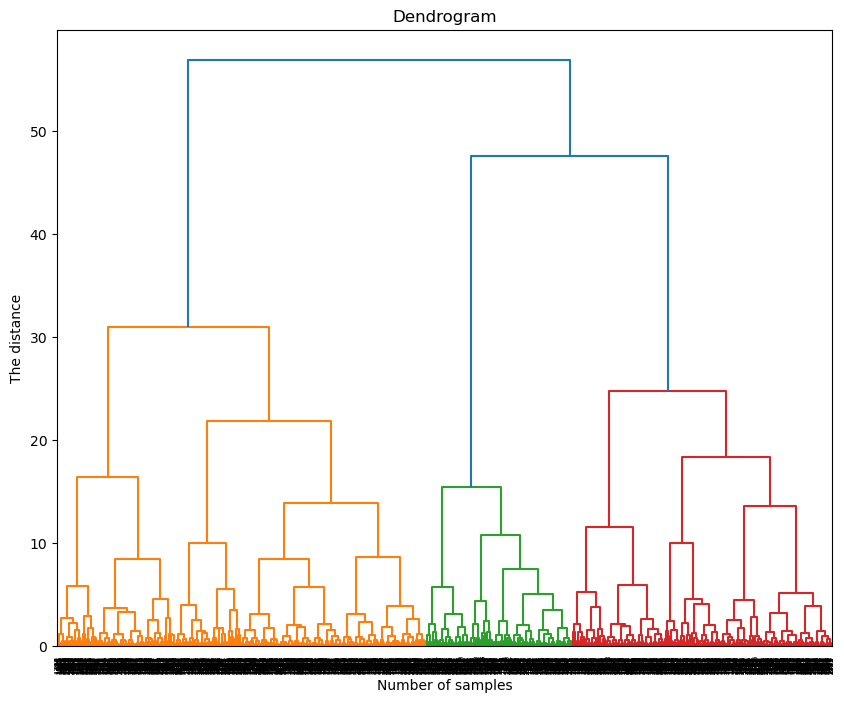

In [ ]:
#we will use the dendrogram see the best number of clusters
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(X_P, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Number of samples")
plt.ylabel("The distance")
plt.show()

In [ ]:
model2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = model2.fit_predict(X_P)

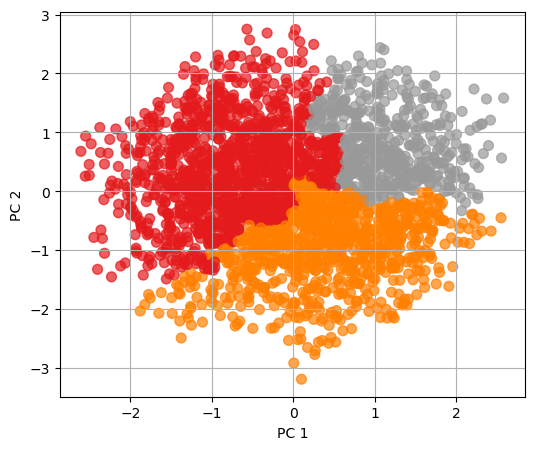

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X_P[:, 0], X_P[:, 1], c=labels_hier, cmap='Set1', s=50, alpha=0.7)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

In [ ]:
Hierarchical_score = silhouette_score(X_P, labels_hier)
print("Silhouette score:" ,Hierarchical_score)

Silhouette score: 0.3109811833470271


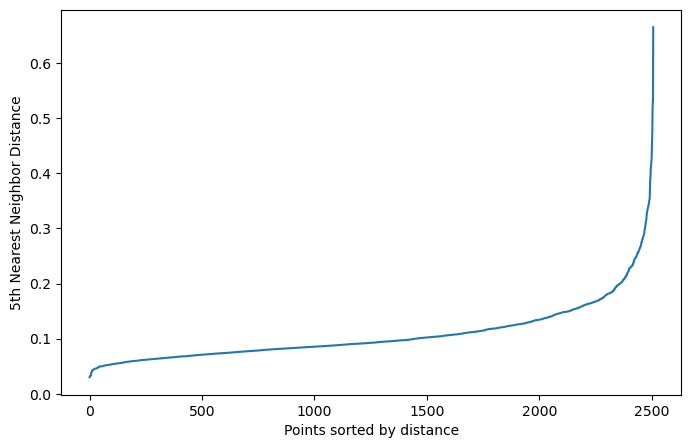

In [ ]:
#Apply DBSCAN
#Using NearestNeighbors to choose the search for the best eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_P)
distances, indices = neighbors_fit.kneighbors(X_P)
distances = np.sort(distances[:, 5])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

In [ ]:
model3 = DBSCAN(eps=0.3, min_samples=3)
labels_dbscan = model3.fit_predict(X_P)

In [ ]:
#see if the eps that we chose with the Nearest neighbors was really the best one
dbscan_score = silhouette_score(X_P, labels_dbscan)
print("Silhouette score:" ,dbscan_score)

Silhouette score: 0.34821424366358744


## Part 4

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we define Define the splits ratios
splits_r = {
    "80/20": (0.8, 0.2),
    "75/25": (0.75, 0.25),
    "70/30": (0.7, 0.3)
}

# A dictionary to store train/test sets
data_splits = {}

for name, (train_size, test_size) in splits_r.items():
    X_train, X_test = train_test_split(X_S, train_size=train_size, test_size=test_size, random_state=42)
    data_splits[name] = (X_train, X_test)
    print(f"Split {name}: Train shape = {X_train.shape}, Test shape = {X_test.shape}")

Split 80/20: Train shape = (2005, 5), Test shape = (502, 5)
Split 75/25: Train shape = (1880, 5), Test shape = (627, 5)
Split 70/30: Train shape = (1754, 5), Test shape = (753, 5)


In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score

results = {}

for split_name, (X_train, X_test) in data_splits.items():
    print(f"\nProcessing split: {split_name}")
    
    results[split_name] = {}
    
    # 1. KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X_train)
    train_labels_k = kmeans.labels_
    test_labels_k = kmeans.predict(X_test)
    
    results[split_name]['KMeans'] = {
        'Silhouette_train': silhouette_score(X_train, train_labels_k),
        'Silhouette_test': silhouette_score(X_test, test_labels_k),
        'DaviesBouldin_train': davies_bouldin_score(X_train, train_labels_k),
        'DaviesBouldin_test': davies_bouldin_score(X_test, test_labels_k)
    }
    
    # 2. Agglomerative Clustering
    agglo_train_labels = AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(X_train)
    agglo_test_labels = AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(X_test)
    
    results[split_name]['Agglomerative'] = {
        'Silhouette_train': silhouette_score(X_train, agglo_train_labels),
        'Silhouette_test': silhouette_score(X_test, agglo_test_labels),
        'DaviesBouldin_train': davies_bouldin_score(X_train, agglo_train_labels),
        'DaviesBouldin_test': davies_bouldin_score(X_test, agglo_test_labels)
    }
    # 3. DBSCAN
    # Choose eps based on your data or use default
    dbscan_train = DBSCAN(eps=0.5, min_samples=5)
    dbscan_test = DBSCAN(eps=0.5, min_samples=5)
    dbscan_train_labels = dbscan_train.fit_predict(X_train)
    dbscan_test_labels = dbscan_test.fit_predict(X_test)
    # DBSCAN can produce noise points with label = -1, silhouette_score requires >=2 clusters
    try:
        sil_train_db = silhouette_score(X_train, dbscan_train_labels)
    except:
        sil_train_db = None
    try:
        sil_test_db = silhouette_score(X_test, dbscan_test_labels)
    except:
        sil_test_db = None
    
    # Davies-Bouldin
    try:
        db_train_db = davies_bouldin_score(X_train, dbscan_train_labels)
    except:
        db_train_db = None
    try:
        db_test_db = davies_bouldin_score(X_test, dbscan_test_labels)
    except:
        db_test_db = None
    
    results[split_name]['DBSCAN'] = {
        'Silhouette_train': sil_train_db,
        'Silhouette_test': sil_test_db,
        'DaviesBouldin_train': db_train_db,
        'DaviesBouldin_test': db_test_db
    }
df_results = pd.concat(
    {split: pd.DataFrame(data).T for split, data in results.items()},
    axis=0
)
print(df_results)



Processing split: 80/20

Processing split: 75/25

Processing split: 70/30
                     Silhouette_train  Silhouette_test  DaviesBouldin_train  \
80/20 KMeans                 0.171251         0.157187             1.776218   
      Agglomerative          0.131453         0.158965             2.152344   
      DBSCAN                -0.352923              NaN             1.353340   
75/25 KMeans                 0.169995         0.160687             1.800008   
      Agglomerative          0.138431         0.146784             1.940534   
      DBSCAN                -0.374150              NaN             1.375197   
70/30 KMeans                 0.174200         0.163885             1.738121   
      Agglomerative          0.133137         0.138067             2.128401   
      DBSCAN                -0.377660        -0.157514             1.384443   

                     DaviesBouldin_test  
80/20 KMeans                   1.851462  
      Agglomerative            1.864838  
      DB

## Comparison of Algorithms
KMeans generally showed stable clustering performance across splits.

Agglomerative Clustering performed slightly worse than KMeans but still produced reasonable clusters.

DBSCAN was the most sensitive algorithm here. Its performance fluctuated widely depending on train/test split.